# Pandas: grouping

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [518]:
cars = pd.read_csv("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/data/labs/vehicles.csv")


In [519]:
cars.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


How many Car models? 

In [520]:
len(cars.Make.unique())

127

group by the data by the Make  using count function

In [521]:
cars.groupby(["Make"]).count()

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
AM General,4,4,4,4,4,4,4,4,4,4,4,4,4,4
ASC Incorporated,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Acura,302,302,302,302,302,302,302,302,302,302,302,302,302,302
Alfa Romeo,41,41,41,41,41,41,41,41,41,41,41,41,41,41
American Motors Corporation,22,22,22,22,22,22,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047
Volvo,717,717,717,717,717,717,717,717,717,717,717,717,717,717
Wallace Environmental,32,32,32,32,32,32,32,32,32,32,32,32,32,32


Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Grams/Mile * Mile/Km -> Grams/Mile * 1 Mile/1.60934Km

$$ \frac{Grams}{Mile} * \frac{Mile}{Km} $$

$$ \frac{Grams}{Mile} * \frac{1 Mile}{1.60934Km}  $$

convert MPG columns to km_per_liter

MPG = Miles/Gallon -> Km/Liter

1 Mile = 1.60934 Km

1 Gallon = 3.78541 Liters

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{Km}{Miles} * \frac{Gallon}{Liters}$$

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{1.60934Km}{ 1Miles} * \frac{1 Gallon}{3.78541 Liters}$$

* ( 1.60934 / 3.78541 )


What brand has the most cars?

In [523]:
def MilesToKm(col): 
    newCol = col / 1.60934
    return newCol

def MPGtoKmPL(col):
    newCol = col / 1.60934 * 3.78541
    return newCol

In [525]:
cars['CO2 Emission Grams/Km'] = MilesToKm(cars['CO2 Emission Grams/Mile'])
cars['City KmPL'] = MilesToKm(cars['City MPG']) 
cars.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,11.184709
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,8.077846
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,345.133719,9.941964
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,8.077846
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,345.133719,8.699218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100,151.614948,21.126673
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100,150.993575,21.126673
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100,151.614948,21.126673
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100,152.857693,21.126673


In [418]:
cars['CO2 Emission Grams/Km'] = cars['CO2 Emission Grams/Mile'] / 1.60934
cars['City KmPL'] = cars['City MPG'] / 1.60934 * 3.78541
cars.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,42.338710
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957


In [419]:
cars["Make"].value_counts()

Chevrolet                             3643
Ford                                  2946
Dodge                                 2360
GMC                                   2347
Toyota                                1836
                                      ... 
Excalibur Autos                          1
S and S Coach Company  E.p. Dutton       1
Environmental Rsch and Devp Corp         1
E. P. Dutton, Inc.                       1
Lambda Control Systems                   1
Name: Make, Length: 127, dtype: int64

<b>show the average CO2_Emission_Grams/Km  by Brand

In [420]:
def averageC02(df): 
    df.groupby(["Make"])[["CO2 Emission Grams/Km"]].mean()
    sortedMean = s.sort_values(by='CO2 Emission Grams/Km', ascending = False)    
    return sortedMean 

In [421]:
averageC02(cars)

,CO2 Emission Grams/Km
Make,
Vector,651.919248
Superior Coaches Div E.p. Dutton,552.213951
S and S Coach Company E.p. Dutton,552.213951
Bugatti,542.497235
Laforza Automobile Inc,502.012683
...,...
MINI,194.935105
Daihatsu,192.742404
Fiat,189.311494


<b>show the average CO2_Emission_Grams/Km  by Brand ... sorted

# (Optional) 

Use `pd.cut` or `pd.qcut` to create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [422]:
### 1 way: boolean operators
cars['Year'].describe()
cars.Year.unique()

array([1984, 1985, 1987, 1997, 1998, 1999, 1995, 1996, 2001, 2002, 2003,
       2000, 2004, 2013, 2014, 2015, 2016, 2017, 1986, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [423]:
def chooseYear(x):
    if x < 1990:
        return '80'
    elif x >= 1990 and x < 2000:
        return '90'
    elif x >= 2000 and x < 2010:
        return '00'
    else: 
        return '10'

In [424]:
cars['decade'] = list(map(chooseYear, cars['Year']))
cars.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL,decade
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,42.338710,80
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957,80


In [425]:
### 2 way: cut function
def genDecades(year): 
    newCol = pd.cut(year, bins=[0, 1990, 2000, 2010, 10000], labels=["'80", "'90", "'00", "'10"])
    return newCol

In [426]:
cars['decade2'] = genDecades(cars['Year'])
cars.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL,decade,decade2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,42.338710,80,'80
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957,80,'80


### Did cars consume more gas in the eighties?

show the average City_Km/Liter by year_range

In [495]:
def showConsume(df): 
    consume = df.groupby(['decade2'])[["City KmPL"]].mean()
    return consume

In [496]:
consume = showConsume(cars)
consume

,City KmPL
decade2,
'80,40.663775
'90,39.858037
'00,39.881356
'10,46.443126


In [497]:
def higestConsume(df): 
    print("Did cars consume more gas in the eighties?/n")
    if df.loc["'80"]["City KmPL"] > df.loc["'10"]["City KmPL"]:
        print("YES")
    else: 
        print("NO")

In [498]:
## print result
higestConsume(showConsume(cars))

Did cars consume more gas in the eighties?/n
NO


In [499]:
higestConsume(consume)

Did cars consume more gas in the eighties?/n
NO


Which brands are more environment friendly?

In [500]:
def sortEnvFriendly(df):
    consumeSorted = showConsume(df).sort_values(by='City KmPL').head(5)
    return consumeSorted

In [501]:
sortEnvFriendly(cars)

,City KmPL
decade2,
'90,39.858037
'00,39.881356
'80,40.663775
'10,46.443126


Does the drivetrain affect fuel consumption?

In [502]:
## show values
drivetrain = cars.groupby(['Drivetrain'])[["City MPG"]].mean()
drivetrain

,City MPG
Drivetrain,
2-Wheel Drive,15.624113
"2-Wheel Drive, Front",25.000000
4-Wheel Drive,16.913989
4-Wheel or All-Wheel Drive,15.035061
All-Wheel Drive,18.312898
Front-Wheel Drive,21.174563
Part-time 4-Wheel Drive,14.620253
Rear-Wheel Drive,15.422049


Text(0.5, 1.0, 'Categ.')

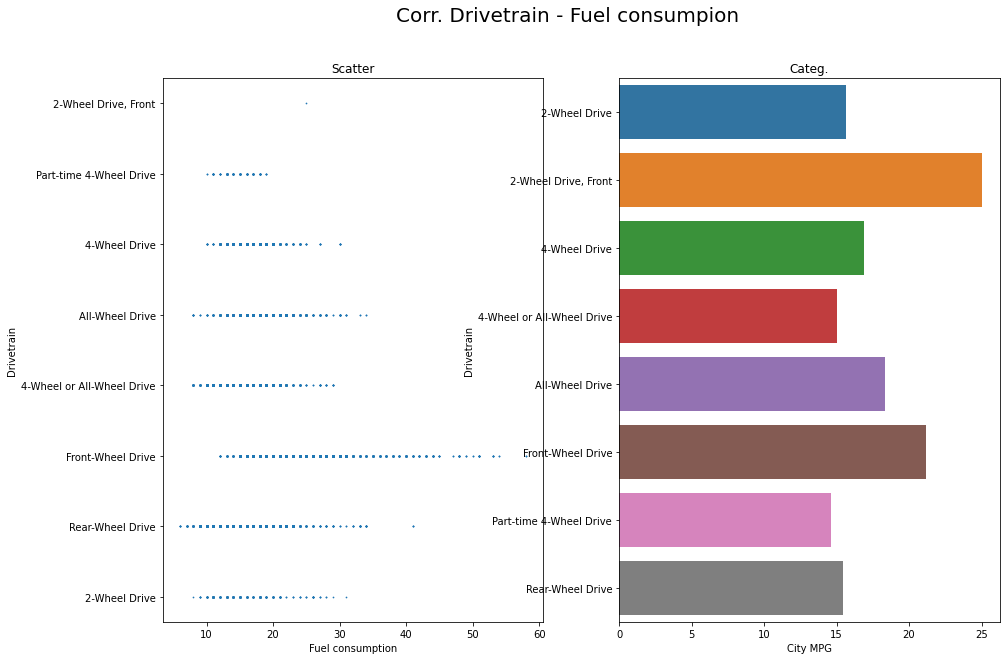

In [503]:
## plot 
fig, ax = plt.subplots(1,2, figsize = (15,10))
fig.suptitle('Corr. Drivetrain - Fuel consumpion', fontsize=20)

plt.subplot(1,2,1)
plt.scatter(cars['City MPG'], cars['Drivetrain'], s=.5)
plt.title("Scatter")
plt.xlabel("Fuel consumption")
plt.ylabel("Drivetrain")

plt.subplot(1,2,2)
sns.barplot(x='City MPG', y=drivetrain.index, data=drivetrain)
plt.title("Categ.")

In [505]:
## plot with plotly 
fig = px.bar(drivetrain, x='City MPG', y=drivetrain.index, 
             color=drivetrain.index, text_auto='.2s',
             title="Corr. Drivetrain - Fuel consumpion")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [506]:
def dummyTransmission(column):
    newCol = ['Automatic' if 'Automatic' in x else 'Manual' for x in column]
    return newCol

In [508]:
cars['dummyTransm'] = dummyTransmission(cars['Transmission'])
cars['dummyTransm'].head(4)

0    Automatic
1    Automatic
2    Automatic
3    Automatic
Name: dummyTransm, dtype: object

In [509]:
def moreConsuming(df): 
    transm = df.groupby(['dummyTransm'])[["City MPG"]].mean()
    print("Do cars with automatic transmission consume more fuel than cars with manual transmission?\n")
    if transm.loc['Automatic', 'City MPG'] > transm.loc['Manual', 'City MPG'] == True: 
        print("YES")
    else: 
        print("NO")   


In [510]:
moreConsuming(cars)

Do cars with automatic transmission consume more fuel than cars with manual transmission?

NO


Use `groupby` and `agg` with different aggregation measures for different columns:

aggregate with average City_Km/Liter and the count of the Trans

In [511]:
cars.groupby(['Drivetrain']).aggregate({'City MPG': 'mean', 'dummyTransm': 'count'})

,City MPG,dummyTransm
Drivetrain,,
2-Wheel Drive,15.624113,423
"2-Wheel Drive, Front",25.000000,1
4-Wheel Drive,16.913989,1058
4-Wheel or All-Wheel Drive,15.035061,6503
All-Wheel Drive,18.312898,2039
Front-Wheel Drive,21.174563,13044
Part-time 4-Wheel Drive,14.620253,158
Rear-Wheel Drive,15.422049,12726


In [ ]:
cars.groupby(['Make', 'Drivetrain']).aggregate({'City MPG': 'mean', 'dummyTransm': 'count'})

aggregate with average City_Km/Liter and the minimum of the Trans

In [ ]:
cars.groupby(['Make']).aggregate({'City MPG': 'mean', 'dummyTransm': 'count'})### your code is here